# Colorstream
### Processing: cooking greens from yellows and blues

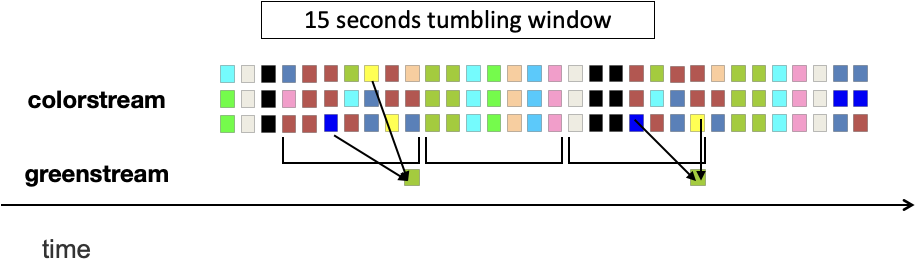

In [1]:
from IPython.display import Image
Image(filename="./images/cooking-greens.png")

### Inspect the sources

- a description of the stream is available at [http://colorstream:8080/colors](http://colorstream:8080/colors)
- the stream can be consumed via websocket at [ws://colorstream:5555](ws://colorstream:5555)

### Import rsplib and initialize the RSPEngine

In [2]:
from rsplib import RSPEngine

In [3]:
jasper = RSPEngine("http://jasper:8181/jasper")

### Define the query, specifing the query id, the t-box and the body of the query

In [4]:
qid  = 'green'

In [5]:
tbox = 'https://linkeddata.stream/ontologies/colors.owl'

In [6]:
body = '''
    CONSTRUCT { 
        ?green a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> ; 
            <http://www.streamreasoning.org/ontologies/2018/9/colors#from> ?yellow , ?blue .
    }
    FROM NAMED WINDOW <colorwindow> ON <http://colorstream:8080/colors> [RANGE PT15S STEP PT15S]
    WHERE {
        { WINDOW <colorwindow> { ?yellow a <http://www.streamreasoning.org/ontologies/2018/9/colors#Yellow> . } }
            UNION
        { WINDOW <colorwindow> { ?blue a <http://www.streamreasoning.org/ontologies/2018/9/colors#Blue> .} }

        BIND( UUID() as ?green )
    }
    '''

In [7]:
green_query = jasper.create(qid, body, tbox)

In [8]:
green_query.sources()

[GET http://colorstream:8080/colors]

### The stream has no endpoint


In [9]:
green_query.stream().endpoints()

[]

### Create a stream endpoint


In [10]:
response = jasper.expose(qid, 'WEBSOCKET')

In [11]:
jasper.streams()

[http://colorstream:8080/colors, http://jasper:8181/jasper/streams/green]

### Inspect and call the response endpoints

In [12]:
response.endpoints()

[GET ws://jasper:8183/jasper/streams/green/observers/2037743231]

In [13]:
output = response.endpoints()[0].call()
output

{
    "@graph": [
        {
            "@id": "urn:uuid:09a8ca03-194c-4f36-a8c6-48cb774bc8cf",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/80f853c5-5262-48e3-9cad-5dabf840c60d"
        },
        {
            "@id": "urn:uuid:3816e967-a4a8-40ea-996d-ae43c53c4fec",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/fbd9c14f-cd5b-4758-920c-7496a89423c0"
        },
        {
            "@id": "urn:uuid:48aec2fb-cea5-4c26-9c1e-573e614646de",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/2c953048-062f-496b-bd5c-aaa871667e17"
        },
        {
            "@id": "urn:uuid:4b667b71-f94e-41a4-a56a-220361467ced",
            "@type": "http://www.streamreasoning.org/ontologies/2018/9/colors#Green",
            "from": "http://jasper:8181/f481b23e-6209-4161-

In [14]:
jasper.delete(qid)

{
    "@id": "queries/green",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/green"
    },
    "prov:uses": {
        "@id": "http://colorstream:8080/colors"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}